### Get the file

In [ ]:
import os
import pandas as pd
from datetime import datetime

def concatenate_orderbooks(asset, date, level, directory):
    file_path = os.path.join(directory, f'{asset}_{date}_orderbook_{level}.feather')
    orderbook = pd.read_feather(file_path)
    return orderbook


def concatenate_orderbooks(asset_list, date, level, directory):
                orderbook_df_list = []
                for asset in asset_list:
                    file_path = os.path.join(directory, f'{asset}_{date}_orderbook_{level}.feather')
                    orderbook_df_list.append(pd.read_feather(file_path))
                orderbook = pd.concat(orderbook_df_list)
                return orderbook


asset_list = ['AAPL', 'ABBV', 'ABNB', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AFL', 'AIG', 'AJG', 'ALL', 'AMAT', 'AMD', 'AMGN', 'AMT', 'AMX', 'AMZN', 'ANET', 'AON', 'APD', 'APH', 'ASML', 'AVGO', 'AXP', 'AZN', 'AZO', 'BA', 'BABA', 'BAC', 'BBVA', 'BDX', 'BHP', 'BKNG', 'BLK', 'BMO', 'BMY', 'BN', 'BNS', 'BP', 'BSX', 'BTI', 'BUD', 'BX', 'C', 'CAT', 'CARR', 'CB', 'CCI', 'CDNS', 'CHTR', 'CI', 'CL', 'CMCSA', 'CME', 'CMG', 'CNI', 'CNQ', 'COF', 'COP', 'COST', 'CP', 'CRH', 'CRM', 'CRWD', 'CSCO', 'CSX', 'CTAS', 'CVS', 'CVX', 'DASH', 'DE', 'DELL', 'DEO', 'DHI', 'DHR', 'DIS', 'DUK', 'ECL', 'EL', 'EMR', 'ENB', 'EOG', 'EPD', 'EQIX', 'EQNR', 'ET', 'ETN', 'EW', 'FCX', 'FDX', 'FMX', 'FTNT', 'GD', 'GE', 'GILD', 'GM', 'GOOGL', 'GS', 'GSK', 'GWW', 'HCA', 'HD', 'HDB', 'HLT', 'HMC', 'HON', 'HSBC', 'HUM', 'IBM', 'IBN', 'ICE', 'INFY', 'ING', 'INTC', 'INTU', 'ISRG', 'ITW', 'JNJ', 'JPM', 'KHC', 'KKR', 'KLAC', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 'LRCX', 'LULU', 'MA', 'MAR', 'MCD', 'MCHP', 'MCO', 'MDLZ', 'MDT', 'MELI', 'MET', 'META', 'MMC', 'MMM', 'MNST', 'MO', 'MPC', 'MRK', 'MRVL', 'MS', 'MSCI', 'MSFT', 'MSI', 'MU', 'NEE', 'NFLX', 'NGG', 'NKE', 'NOC', 'NOW', 'NSC', 'NTES', 'NUE', 'NVDA', 'NVO', 'NVS', 'NXPI', 'ORCL', 'ORLY', 'OXY', 'PANW', 'PAYX', 'PBR', 'PCAR', 'PDD', 'PEP', 'PFE', 'PG', 'PGR', 'PH', 'PLD', 'PM', 'PNC', 'PSA', 'PSX', 'PXD', 'PYPL', 'QCOM', 'RACE', 'REGN', 'RELX', 'RIO', 'ROP', 'ROST', 'RSG', 'RY', 'SAN', 'SAP', 'SBUX', 'SCCO', 'SCHW', 'SHEL', 'SHOP', 'SHW', 'SLB', 'SMFG', 'SNOW', 'SNPS', 'SNY', 'SO', 'SONY', 'SPG', 'SPGI', 'SPOT', 'STLA', 'SYK', 'T', 'TD', 'TEAM', 'TFC', 'TGT', 'TJX', 'TM', 'TMO', 'TMUS', 'TRI', 'TRV', 'TSLA', 'TSM', 'TT', 'TTE', 'TXN', 'UBER', 'UBS', 'UL', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'VALE', 'VLO', 'VRTX', 'VZ', 'WDAY', 'WELL', 'WFC', 'WM', 'WMT', 'XOM', 'ZTS']
level = 15
date_listen = ["2023-03-21", "2023-03-22", "2023-03-23"]
directory = r"/Users/jensknudsen/Desktop/LOBSTER_DATA/Feather"

# Divide the list into sublists of 30 assets each
sublists = [asset_list[i:i+15] for i in range(0, len(asset_list), 15)]


In [ ]:
# for 1st sublist
df_spion_1 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_1[key] = concatenate_orderbooks(sublists[0], date, level, directory)
    #only keep certain columns that is ts, type, order_id direction aks_price_1, ask_size_1, bid_price_1, bid_size_1, midquote, spread, asset
    df_spion_1[key] = df_spion_1[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]
    

In [ ]:
# for 2nd sublist
df_spion_2 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_2[key] = concatenate_orderbooks(sublists[1], date, level, directory)
    df_spion_2[key] = df_spion_2[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]

In [ ]:
# for 3rd sublist
df_spion_3 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_3[key] = concatenate_orderbooks(sublists[2], date, level, directory)
    df_spion_3[key] = df_spion_3[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]


In [ ]:
# for 4th sublist
df_spion_4 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_4[key] = concatenate_orderbooks(sublists[3], date, level, directory)
    df_spion_4[key] = df_spion_4[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]


In [ ]:
# for 4th sublist
df_spion_5 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_5[key] = concatenate_orderbooks(sublists[4], date, level, directory)
    df_spion_5[key] = df_spion_5[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]


In [ ]:
# for 6th sublist
df_spion_6 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_6[key] = concatenate_orderbooks(sublists[5], date, level, directory)
    df_spion_6[key] = df_spion_6[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]


In [ ]:
# for 7th sublist
df_spion_7 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_7[key] = concatenate_orderbooks(sublists[6], date, level, directory)
    df_spion_7[key] = df_spion_7[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]

In [ ]:
# for 8th sublist
df_spion_8 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_8[key] = concatenate_orderbooks(sublists[7], date, level, directory)
    df_spion_8[key] = df_spion_8[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]

In [ ]:
# for 9th sublist
df_spion_9 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_9[key] = concatenate_orderbooks(sublists[8], date, level, directory)
    df_spion_9[key] = df_spion_9[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]


In [ ]:
# for 10th sublist
df_spion_10 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_10[key] = concatenate_orderbooks(sublists[9], date, level, directory)
    df_spion_10[key] = df_spion_10[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]


In [ ]:
# for 11th sublist
df_spion_11 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_11[key] = concatenate_orderbooks(sublists[10], date, level, directory)
    df_spion_11[key] = df_spion_11[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]


In [ ]:
# for 12th sublist
df_spion_12 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_12[key] = concatenate_orderbooks(sublists[11], date, level, directory)
    df_spion_12[key] = df_spion_12[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]


In [ ]:
# for 13th sublist
df_spion_13 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_13[key] = concatenate_orderbooks(sublists[12], date, level, directory)
    df_spion_13[key] = df_spion_13[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]


In [ ]:
# for 14th sublist
df_spion_14 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_14[key] = concatenate_orderbooks(sublists[13], date, level, directory)
    df_spion_14[key] = df_spion_14[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]


In [ ]:
# for 15th sublist
df_spion_15 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_15[key] = concatenate_orderbooks(sublists[14], date, level, directory)
    df_spion_15[key] = df_spion_15[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]


In [ ]:
# for 16th sublist
df_spion_16 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_16[key] = concatenate_orderbooks(sublists[15], date, level, directory)
    df_spion_16[key] = df_spion_16[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]


In [ ]:
# for 17th sublist
df_spion_17 = {}
for date in date_listen:
    key = f"{date}"
    df_spion_17[key] = concatenate_orderbooks(sublists[16], date, level, directory)
    df_spion_17[key] = df_spion_17[key][['ts', 'type', 'direction', 'ask_size_1', 'bid_size_1', 'midquote', 'spread', 'asset']]


In [ ]:
#combine the dictionaries df_spion_1, df_spion_2, df_spion_3, df_spion_4 into one dictionary
df_spion = {}

for date in date_listen:
    key = f"{date}"
    df_spion[key] = pd.concat([df_spion_1[key], df_spion_2[key], df_spion_3[key], df_spion_4[key],df_spion_5[key], df_spion_6[key], df_spion_7[key], df_spion_8[key], df_spion_9[key], df_spion_10[key], df_spion_11[key], df_spion_12[key], df_spion_13[key], df_spion_14[key], df_spion_15[key], df_spion_16[key], df_spion_17[key]])

In [ ]:
# combine df_spion["2023-03-21"], df_spion["2023-03-22"], df_spion["2023-03-23"] into one dataframe
df_spion = pd.concat([df_spion["2023-03-21"], df_spion["2023-03-22"], df_spion["2023-03-23"]])

In [ ]:
# reset index
df_spion.reset_index(drop=True, inplace=True)

In [ ]:
# make the df_spion into a feather file in the directory
df_spion.to_feather("/Users/jensknudsen/Desktop/LOBSTER_DATA/PROJECT/Descriptive_analysis/df_spion.feather")

### Data handeling

In [1]:
import os
import pandas as pd
from datetime import datetime
# get the feather file in df
df = pd.read_feather("/Users/jensknudsen/Desktop/LOBSTER_DATA/PROJECT/Descriptive_analysis/df_spion.feather")

In [2]:
len(df)

323893141

In [2]:
asset_list = ['AAPL', 'ABBV', 'ABNB', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADP', 'AFL','AIG', 'ALL', 'AMAT', 'AMD', 'AMT', 'AMZN', 'ANET', 'ASML', 'AVGO','AXP', 'AZN', 'BABA', 'BAC', 'BA', 'BBVA', 'BDX', 'BHP', 'BKNG','BLK', 'BMY', 'BNS', 'BP', 'BSX', 'BTI', 'BUD', 'BX', 'CARR','CCI', 'CDNS', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CP', 'CRH','CRM', 'CSCO', 'CSX', 'CVS', 'CVX', 'C', 'DASH', 'DEO','DE', 'DHI', 'DIS', 'DUK', 'EL', 'EMR', 'ENB', 'EOG', 'EPD','EQNR', 'ETN', 'ET', 'EW', 'FCX', 'FTNT', 'GD', 'GE', 'GILD', 'GM','GOOGL', 'GSK', 'GWW', 'HCA', 'HDB', 'HD', 'HLT', 'HMC', 'HON','HSBC', 'HUM', 'IBM', 'IBN', 'ICE', 'INFY', 'ING', 'INTC', 'ISRG','ITW', 'JNJ', 'JPM', 'KHC', 'KKR', 'KLAC', 'KO', 'LIN', 'LLY','LMT', 'LOW', 'LRCX', 'LULU', 'MAR', 'MA', 'MCD', 'MCHP', 'MCO','MDLZ', 'MDT', 'MELI', 'META', 'MET', 'MMM', 'MNST', 'MO', 'MPC','MRK', 'MRVL', 'MSCI', 'MSFT', 'MS', 'MU', 'NEE', 'NFLX', 'NGG','NKE', 'NOW', 'NSC', 'NTES', 'NUE', 'NVDA', 'NVO', 'NVS', 'NXPI','ORCL', 'ORLY', 'OXY', 'PANW', 'PAYX', 'PBR', 'PCAR', 'PEP','PFE', 'PGR', 'PG', 'PLD', 'PM', 'PNC', 'PSA', 'PSX', 'PXD','PYPL', 'QCOM', 'RACE', 'REGN', 'RELX', 'RIO', 'ROST', 'RY', 'SAN','SAP', 'SBUX', 'SCHW', 'SHEL', 'SHOP', 'SHW', 'SLB', 'SNOW','SNPS', 'SNY', 'SO', 'SPG', 'SPOT', 'STLA', 'SYK', 'TD', 'TEAM','TFC', 'TGT', 'TMUS', 'TRI', 'TSLA', 'TSM', 'TTE', 'TXN', 'T','UBER', 'UBS', 'UL', 'UNH', 'USB', 'VALE', 'VLO', 'VRTX', 'VZ','WELL', 'WFC', 'WM', 'ZTS']

# New dataframe to store counts
number_of_trades = []
type_of_trades = []
the_mean_spread = []

# Loop through each unique asset and count the rows
for asset in asset_list:
    count_number_of_trades = df[df['asset'] == asset].shape[0]
    number_of_trades.append(count_number_of_trades)
    count_type_of_trades = df[df['asset'] == asset]['type'].value_counts()
    type_of_trades.append(count_type_of_trades)
    mean_spread = df[df['asset'] == asset]['spread'].mean()
    the_mean_spread.append(mean_spread)
    

In [3]:
# make dataframe of the number of trades and the asset
df_number_of_trades = pd.DataFrame({'asset': asset_list, 'number_of_trades': number_of_trades})

# make dataframe of the type of trades and the asset and include the asset
df_type_of_trades = pd.DataFrame(type_of_trades)
# add the asset to the dataframe
df_type_of_trades['asset'] = asset_list
print(df_type_of_trades.columns)
# Adjusting the desired_order list to use integers for numeric columns
desired_order = [1, 2, 3, 4, 5, 6, 'asset']

# Reordering the DataFrame columns with the corrected desired_order list
df_type_of_trades = df_type_of_trades[desired_order]
df_type_of_trades = df_type_of_trades.set_index('asset')

# make dataframe of the mean spread and the asset
df_the_mean_spread = pd.DataFrame({'asset': asset_list, 'mean_spread': the_mean_spread})

Index([1, 3, 4, 5, 2, 6, 'asset'], dtype='object', name='type')


In [6]:
# save the dataframe in a csv file
df_number_of_trades.to_csv('/Users/jensknudsen/Desktop/LOBSTER_DATA/PROJECT/Descriptive_analysis/df_number_of_trades.csv')
df_type_of_trades.to_csv('/Users/jensknudsen/Desktop/LOBSTER_DATA/PROJECT/Descriptive_analysis/df_type_of_trades.csv')
df_the_mean_spread.to_csv('/Users/jensknudsen/Desktop/LOBSTER_DATA/PROJECT/Descriptive_analysis/df_the_mean_spread.csv')

In [29]:
import os
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
# get the csv files in df
df_number_of_trades = pd.read_csv('/Users/jensknudsen/Desktop/LOBSTER_DATA/PROJECT/Descriptive_analysis/df_number_of_trades.csv')
df_type_of_trades = pd.read_csv('/Users/jensknudsen/Desktop/LOBSTER_DATA/PROJECT/Descriptive_analysis/df_type_of_trades.csv')
df_the_mean_spread = pd.read_csv('/Users/jensknudsen/Desktop/LOBSTER_DATA/PROJECT/Descriptive_analysis/df_the_mean_spread.csv')

# delete the unnamed column
del df_number_of_trades['Unnamed: 0']
del df_the_mean_spread['Unnamed: 0']

### Plot for the number of trades

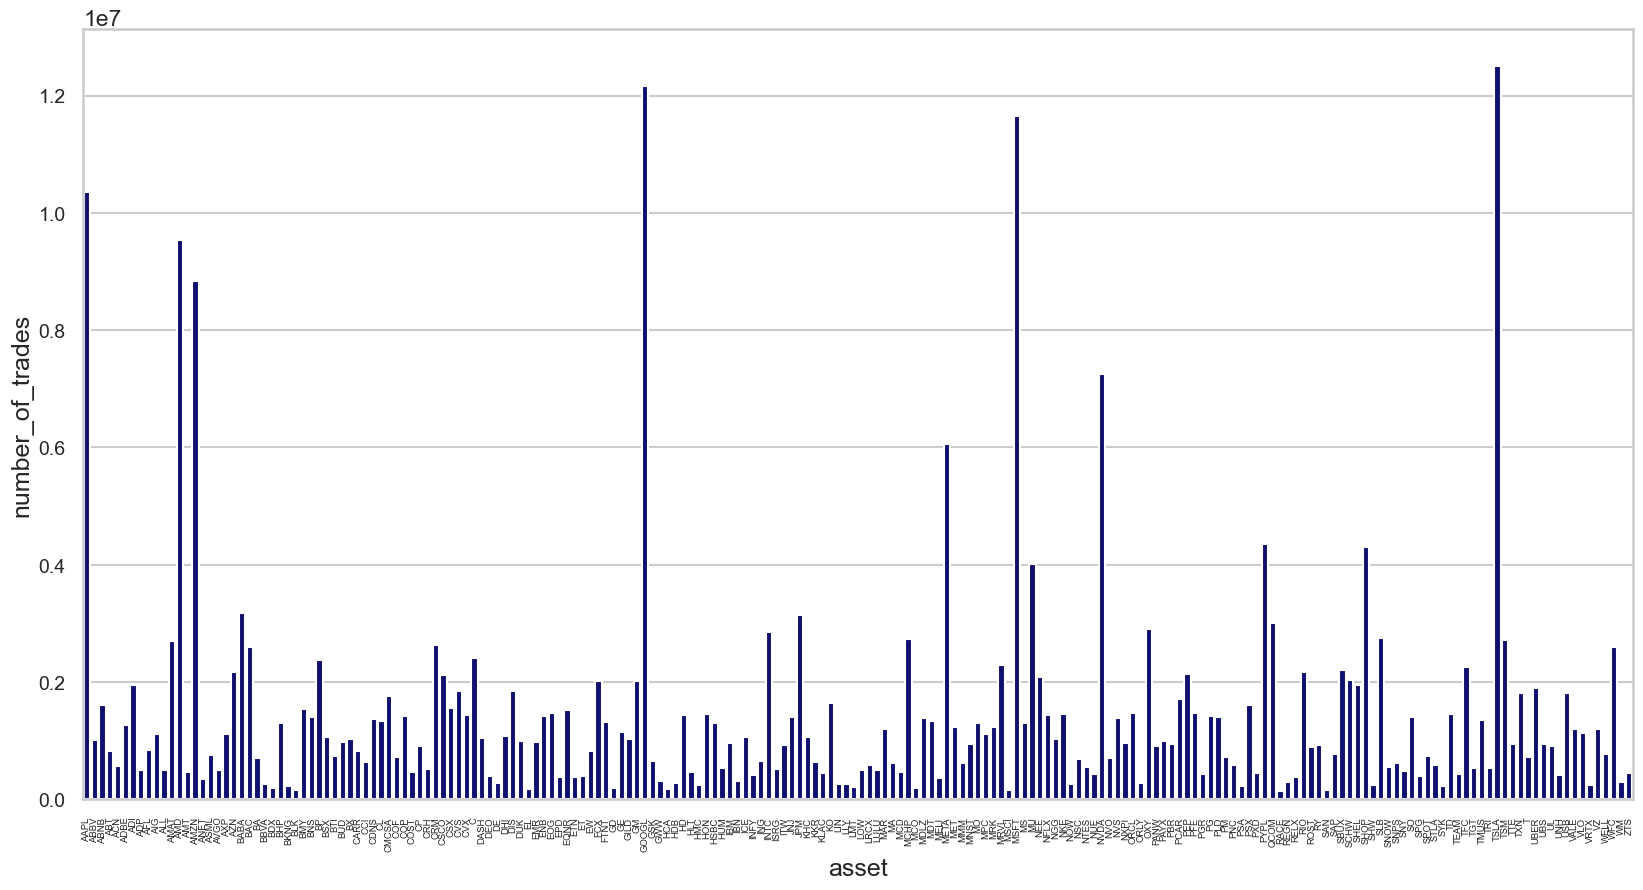

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))

# Using a single color for all bars. Choose a color that fits your theme.
# Example: 'slategray' for a professional and conservative look.
sns.barplot(x='asset', y='number_of_trades', data=df_number_of_trades, color='Navy')

plt.yticks(fontsize=14)
plt.xticks(fontsize=6.8, rotation=90)

plt.show()


### Plot for the number of trades based on the type of trades

In [32]:
df_type_of_trades = df_type_of_trades.set_index('asset')

# make a graphical representation of the type of trades for each asset
df_type_of_trades.plot(kind='bar', stacked=True, figsize=(20, 10))

# make a list for the 20 assets with the highest mean spread
highest_values = df_type_of_trades.sum(axis=1).nlargest(30, 'all').reset_index()

asset_list = ['AAPL', 'ABBV', 'ABNB', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADP', 'AFL','AIG', 'ALL', 'AMAT', 'AMD', 'AMT', 'AMZN', 'ANET', 'ASML', 'AVGO','AXP', 'AZN', 'BABA', 'BAC', 'BA', 'BBVA', 'BDX', 'BHP', 'BKNG','BLK', 'BMY', 'BNS', 'BP', 'BSX', 'BTI', 'BUD', 'BX', 'CARR','CCI', 'CDNS', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CP', 'CRH','CRM', 'CSCO', 'CSX', 'CVS', 'CVX', 'C', 'DASH', 'DEO','DE', 'DHI', 'DIS', 'DUK', 'EL', 'EMR', 'ENB', 'EOG', 'EPD','EQNR', 'ETN', 'ET', 'EW', 'FCX', 'FTNT', 'GD', 'GE', 'GILD', 'GM','GOOGL', 'GSK', 'GWW', 'HCA', 'HDB', 'HD', 'HLT', 'HMC', 'HON','HSBC', 'HUM', 'IBM', 'IBN', 'ICE', 'INFY', 'ING', 'INTC', 'ISRG','ITW', 'JNJ', 'JPM', 'KHC', 'KKR', 'KLAC', 'KO', 'LIN', 'LLY','LMT', 'LOW', 'LRCX', 'LULU', 'MAR', 'MA', 'MCD', 'MCHP', 'MCO','MDLZ', 'MDT', 'MELI', 'META', 'MET', 'MMM', 'MNST', 'MO', 'MPC','MRK', 'MRVL', 'MSCI', 'MSFT', 'MS', 'MU', 'NEE', 'NFLX', 'NGG','NKE', 'NOW', 'NSC', 'NTES', 'NUE', 'NVDA', 'NVO', 'NVS', 'NXPI','ORCL', 'ORLY', 'OXY', 'PANW', 'PAYX', 'PBR', 'PCAR', 'PEP','PFE', 'PGR', 'PG', 'PLD', 'PM', 'PNC', 'PSA', 'PSX', 'PXD','PYPL', 'QCOM', 'RACE', 'REGN', 'RELX', 'RIO', 'ROST', 'RY', 'SAN','SAP', 'SBUX', 'SCHW', 'SHEL', 'SHOP', 'SHW', 'SLB', 'SNOW','SNPS', 'SNY', 'SO', 'SPG', 'SPOT', 'STLA', 'SYK', 'TD', 'TEAM','TFC', 'TGT', 'TMUS', 'TRI', 'TSLA', 'TSM', 'TTE', 'TXN', 'T','UBER', 'UBS', 'UL', 'UNH', 'USB', 'VALE', 'VLO', 'VRTX', 'VZ','WELL', 'WFC', 'WM', 'ZTS']

# from the highest_values list find the index for the 20 assets with the highest mean spread and add to the highest_values list
highest_values['index'] = highest_values['asset'].apply(lambda x: asset_list.index(x))

# make the index the index to the highest_values list
highest_values.set_index('index', inplace=True)

# delete the index header
highest_values.index.name = None

# change the column name from 0 to 'mean_spread'
highest_values.rename(columns={0: 'mean_spread'}, inplace=True)

for index, value in highest_values.iterrows():
    plt.text(index, value['mean_spread'], df_the_mean_spread['asset'][index], ha='center', va='bottom')

# make a line for the mean of df_type_of_trades.sum(axis=1)
plt.axhline(df_type_of_trades.sum(axis=1).mean(), color='r', linestyle='--', linewidth=2)

# change the name of the y-axis
plt.ylabel('Number of trades', fontsize=10)
plt.xlabel('Asset', fontsize=10)


plt.yticks(fontsize=14)
plt.xticks(fontsize=6)
plt.show()

KeyError: "None of ['asset'] are in the columns"

### Plot for the average spread

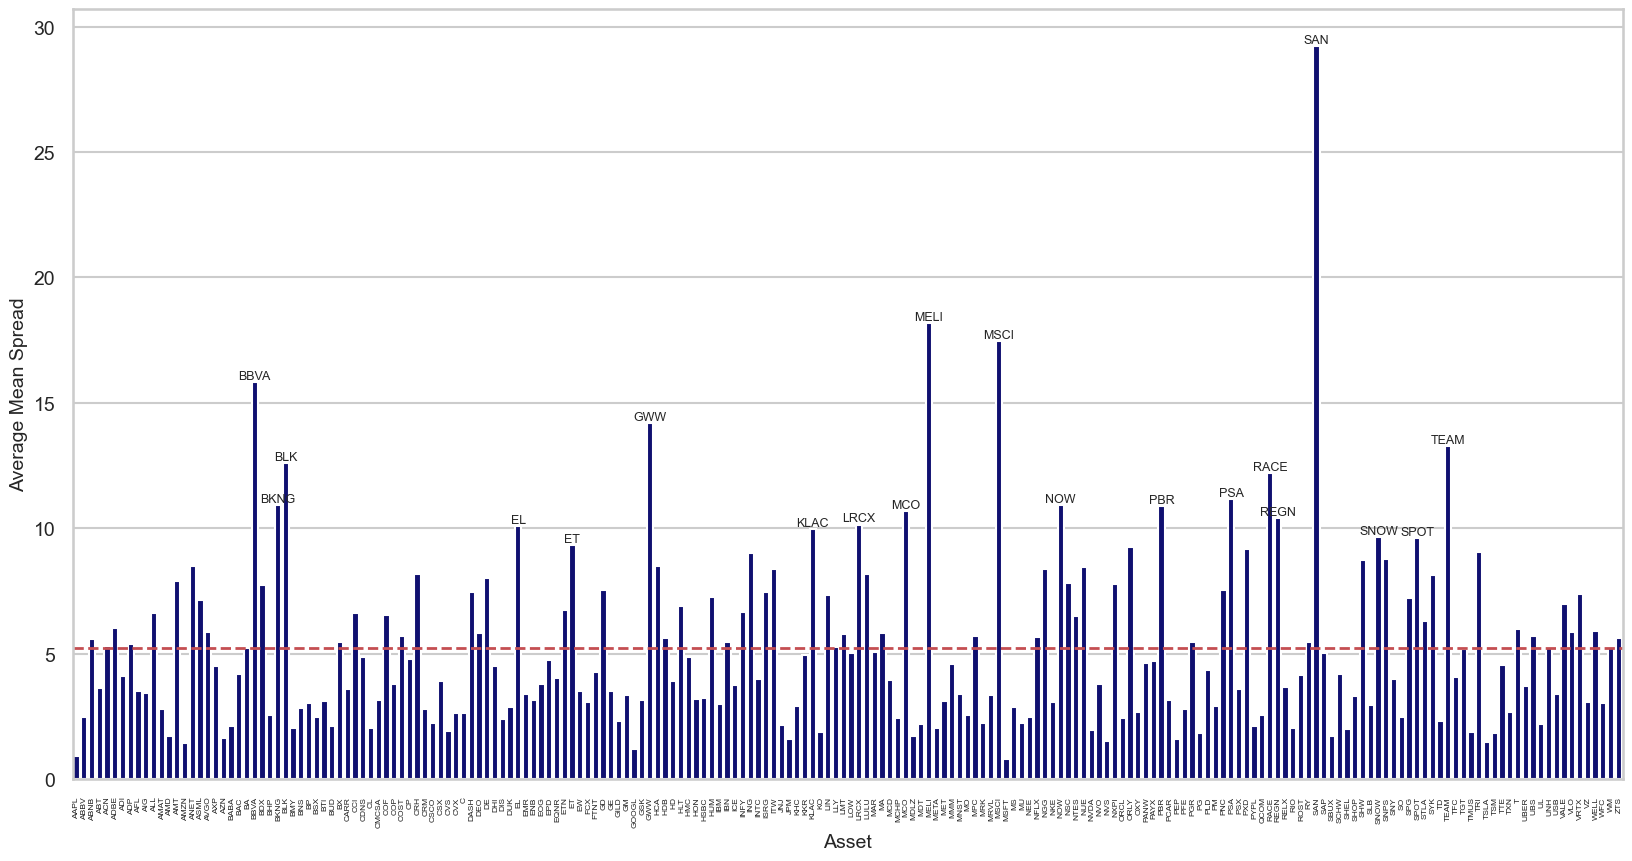

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your DataFrame is defined as df_the_mean_spread and contains the appropriate columns

plt.figure(figsize=(20, 10))

# Use navy color for the bars
sns.barplot(x='asset', y='mean_spread', data=df_the_mean_spread, color='navy')
plt.xticks(rotation=90)

# Add a horizontal line for the overall mean spread across all assets
mean_spread = df_the_mean_spread['mean_spread'].mean()
plt.axhline(y=mean_spread, color='r', linestyle='--', linewidth=2)

# Identify the 20 assets with the highest mean spread
highest_values = df_the_mean_spread.nlargest(20, 'mean_spread')

# Annotate the graph with the asset names for the top 20 assets
# Correcting the annotation part to ensure that asset names are displayed correctly
for index, row in highest_values.iterrows():
    # Adjust the text position and alignment for better readability
    plt.text(row.name, row['mean_spread'], str(row['asset']), ha='center', va='bottom', fontsize=9)

plt.ylabel('Average Mean Spread', fontsize=14)
plt.xlabel('Asset', fontsize=14)

plt.yticks(fontsize=14)
plt.xticks(fontsize=6.1) # Adjusted for better readability
plt.show()


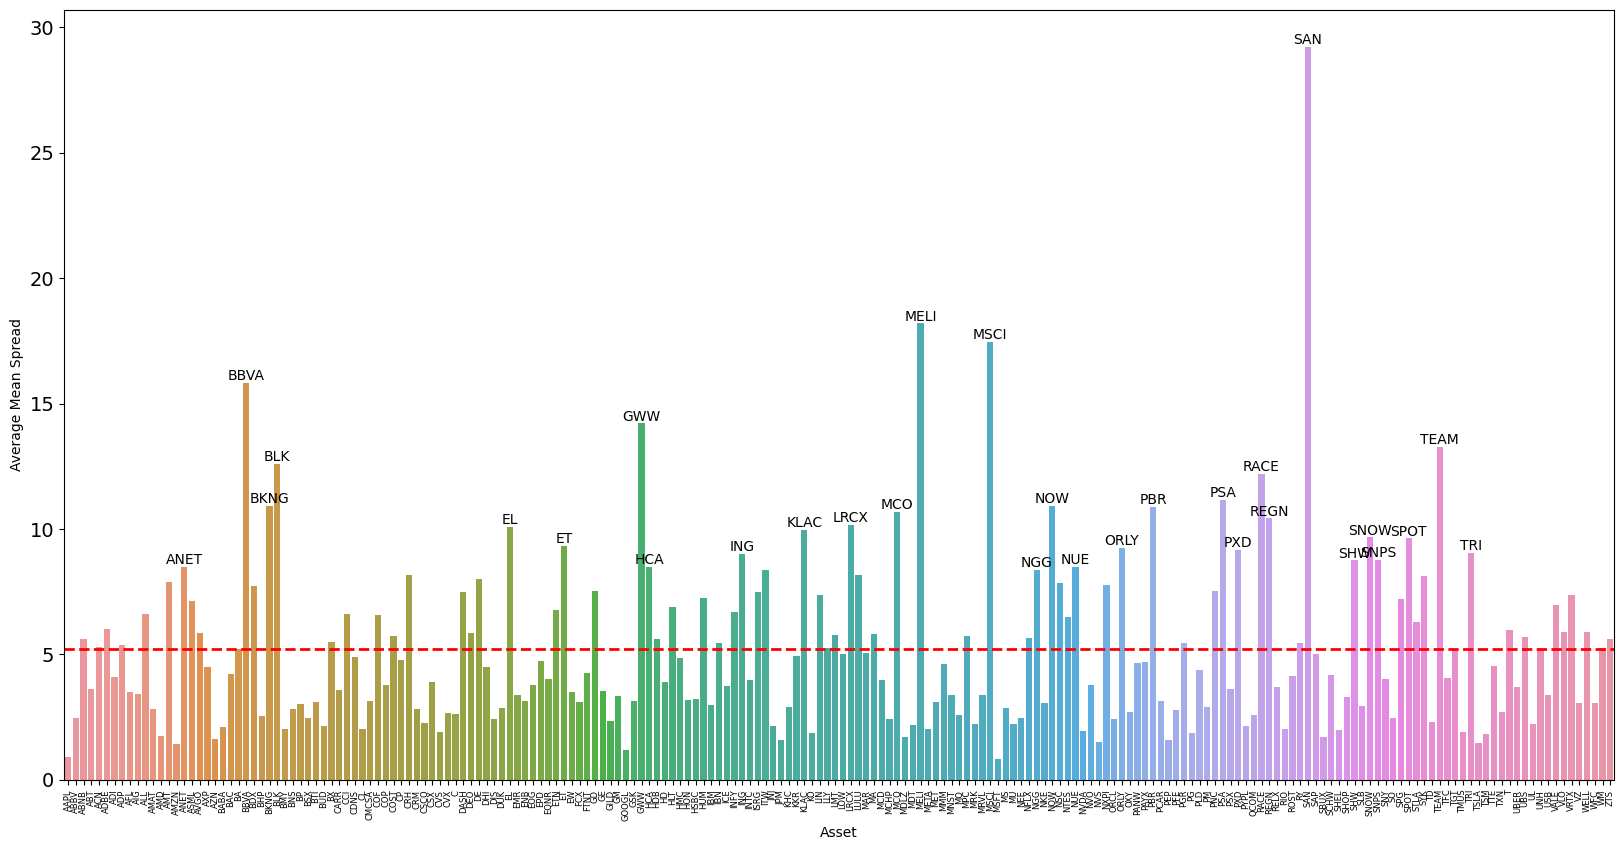

In [21]:
# make a graphical representation of the mean spread
plt.figure(figsize=(20, 10))
sns.barplot(x='asset', y='mean_spread', data=df_the_mean_spread)
plt.xticks(rotation=90)
# make the y-axis text more readable
# make a horizontal line at the mean spread for all assets
plt.axhline(y=df_the_mean_spread['mean_spread'].mean(), color='r',  linestyle='--', linewidth=2)
# make a list for the 20 assets with the highest mean spread
highest_values = df_the_mean_spread.nlargest(30, 'mean_spread')
# use the highest_values list to annotate the graph with the asset name 
for index, value in highest_values.iterrows():
    plt.text(index, value['mean_spread'], df_the_mean_spread['asset'][index], ha='center', va='bottom')

plt.ylabel('Average Mean Spread', fontsize=10)
plt.xlabel('Asset', fontsize=10)

plt.yticks(fontsize=14)
plt.xticks(fontsize=6)
plt.show()


### Make Categories 

In [34]:
asset_list = ['AAPL', 'ABBV', 'ABNB', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADP', 'AFL','AIG', 'ALL', 'AMAT', 'AMD', 'AMT', 'AMZN', 'ANET', 'ASML', 'AVGO','AXP', 'AZN', 'BABA', 'BAC', 'BA', 'BBVA', 'BDX', 'BHP', 'BKNG','BLK', 'BMY', 'BNS', 'BP', 'BSX', 'BTI', 'BUD', 'BX', 'CARR','CCI', 'CDNS', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CP', 'CRH','CRM', 'CSCO', 'CSX', 'CVS', 'CVX', 'C', 'DASH', 'DEO','DE', 'DHI', 'DIS', 'DUK', 'EL', 'EMR', 'ENB', 'EOG', 'EPD','EQNR', 'ETN', 'ET', 'EW', 'FCX', 'FTNT', 'GD', 'GE', 'GILD', 'GM','GOOGL', 'GSK', 'GWW', 'HCA', 'HDB', 'HD', 'HLT', 'HMC', 'HON','HSBC', 'HUM', 'IBM', 'IBN', 'ICE', 'INFY', 'ING', 'INTC', 'ISRG','ITW', 'JNJ', 'JPM', 'KHC', 'KKR', 'KLAC', 'KO', 'LIN', 'LLY','LMT', 'LOW', 'LRCX', 'LULU', 'MAR', 'MA', 'MCD', 'MCHP', 'MCO','MDLZ', 'MDT', 'MELI', 'META', 'MET', 'MMM', 'MNST', 'MO', 'MPC','MRK', 'MRVL', 'MSCI', 'MSFT', 'MS', 'MU', 'NEE', 'NFLX', 'NGG','NKE', 'NOW', 'NSC', 'NTES', 'NUE', 'NVDA', 'NVO', 'NVS', 'NXPI','ORCL', 'ORLY', 'OXY', 'PANW', 'PAYX', 'PBR', 'PCAR', 'PEP','PFE', 'PGR', 'PG', 'PLD', 'PM', 'PNC', 'PSA', 'PSX', 'PXD','PYPL', 'QCOM', 'RACE', 'REGN', 'RELX', 'RIO', 'ROST', 'RY', 'SAN','SAP', 'SBUX', 'SCHW', 'SHEL', 'SHOP', 'SHW', 'SLB', 'SNOW','SNPS', 'SNY', 'SO', 'SPG', 'SPOT', 'STLA', 'SYK', 'TD', 'TEAM','TFC', 'TGT', 'TMUS', 'TRI', 'TSLA', 'TSM', 'TTE', 'TXN', 'T','UBER', 'UBS', 'UL', 'UNH', 'USB', 'VALE', 'VLO', 'VRTX', 'VZ','WELL', 'WFC', 'WM', 'ZTS']

In [35]:
industry_categories = {
    "Technology": [
        "AAPL", "ADBE", "ADI", "AMAT", "AMD", "ANET", "ASML", "AVGO", "CDNS",
        "CRM", "CSCO", "FTNT", "GOOGL", "IBM", "INTC", "ISRG", "KLAC", "MA", 
        "MCHP", "MSFT", "MU", "NFLX", "NOW", "NVDA", "NXPI", "ORCL", "PAYX", 
        "PYPL", "QCOM", "SNOW", "SNPS", "TEAM", "TXN", "UBER"
    ],
    "Healthcare": [
        "ABBV", "ABT", "BMY", "BSX", "EW", "GILD", "HCA", "JNJ", "LLY", 
        "MDT", "MRK", "NVO", "PFE", "REGN", "SYK", "VRTX", "ZTS"
    ],
    "Financials": [
        "AXP", "BAC", "BLK", "BX", "C", "COF", "GS", "HDB", "ICE", "JPM", 
        "KKR", "MA", "MSCI", "PNC", "SCHW", "TFC", "UBS", "V"
    ],
    "Consumer Discretionary": [
        "AMZN", "BKNG", "CMCSA", "COST", "DHI", "DIS", "F", "GM", "HD", "HLT", 
        "LOW", "LULU", "MAR", "MCD", "NKE", "SBUX", "TGT", "TSLA"
    ],
    "Consumer Staples": [
        "CL", "COST", "EL", "KHC", "KO", "MDLZ", "MO", "PEP", "PG", "PM", "UL"
    ],
    "Energy": [
        "BP", "COP", "CVX", "ENB", "EOG", "EPD", "EQNR", "XOM"
    ],
    "Industrials": [
        "BA", "CAT", "DE", "EMR", "GE", "HON", "LMT", "MMM", "RTX", "UNP"
    ],
    "Materials": [
        "APD", "BHP", "DD", "ECL", "FCX", "LIN", "NEM", "SHW"
    ],
    "Real Estate": [
        "AMT", "CBRE", "PLD", "SPG", "WELL"
    ],
    "Utilities": [
        "D", "DUK", "NEE", "SO", "XEL"
    ],
    "Telecommunication": [
        "T", "TMUS", "VZ"
    ]
}

### Make plot for the number of trades for each industry

In [36]:
df_industry_number_of_trades

NameError: name 'df_industry_number_of_trades' is not defined

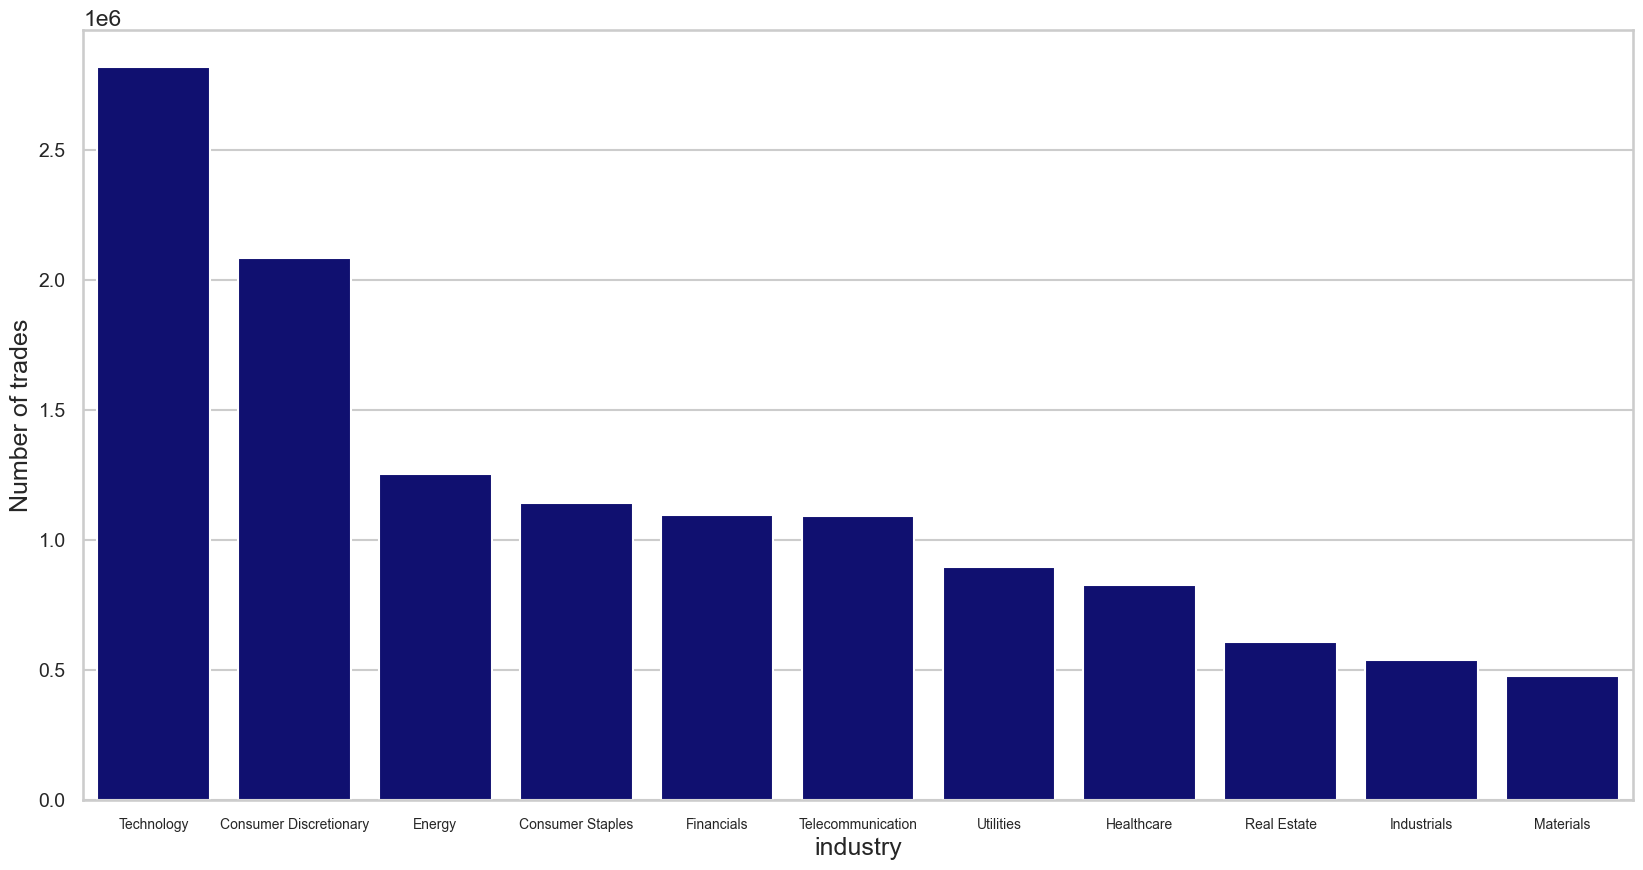

In [41]:
# based on the industry_categories dictionary make new visual representation of the number of trades for each industry
industry_number_of_trades = {}

for industry, assets in industry_categories.items():
    industry_number_of_trades[industry] = df_number_of_trades[df_number_of_trades['asset'].isin(assets)]['number_of_trades'].sum()/len(industry_categories[industry])

# make a dataframe of the industry_number_of_trades
df_industry_number_of_trades = pd.DataFrame(industry_number_of_trades.items(), columns=['industry', 'number_of_trades'])


df_industry_number_of_trades

plt.figure(figsize=(20, 10))
sns.barplot(x='industry', y='number_of_trades', data=df_industry_number_of_trades.sort_values('number_of_trades', ascending=False), color='navy')

# make the y axis title 
plt.ylabel('Number of trades', fontsize=18)
plt.yticks(fontsize=14)
# make the x-axis text more readable and rotate the text
plt.xticks(fontsize=10)

plt.show()

### Make plot for the average spread for each industry

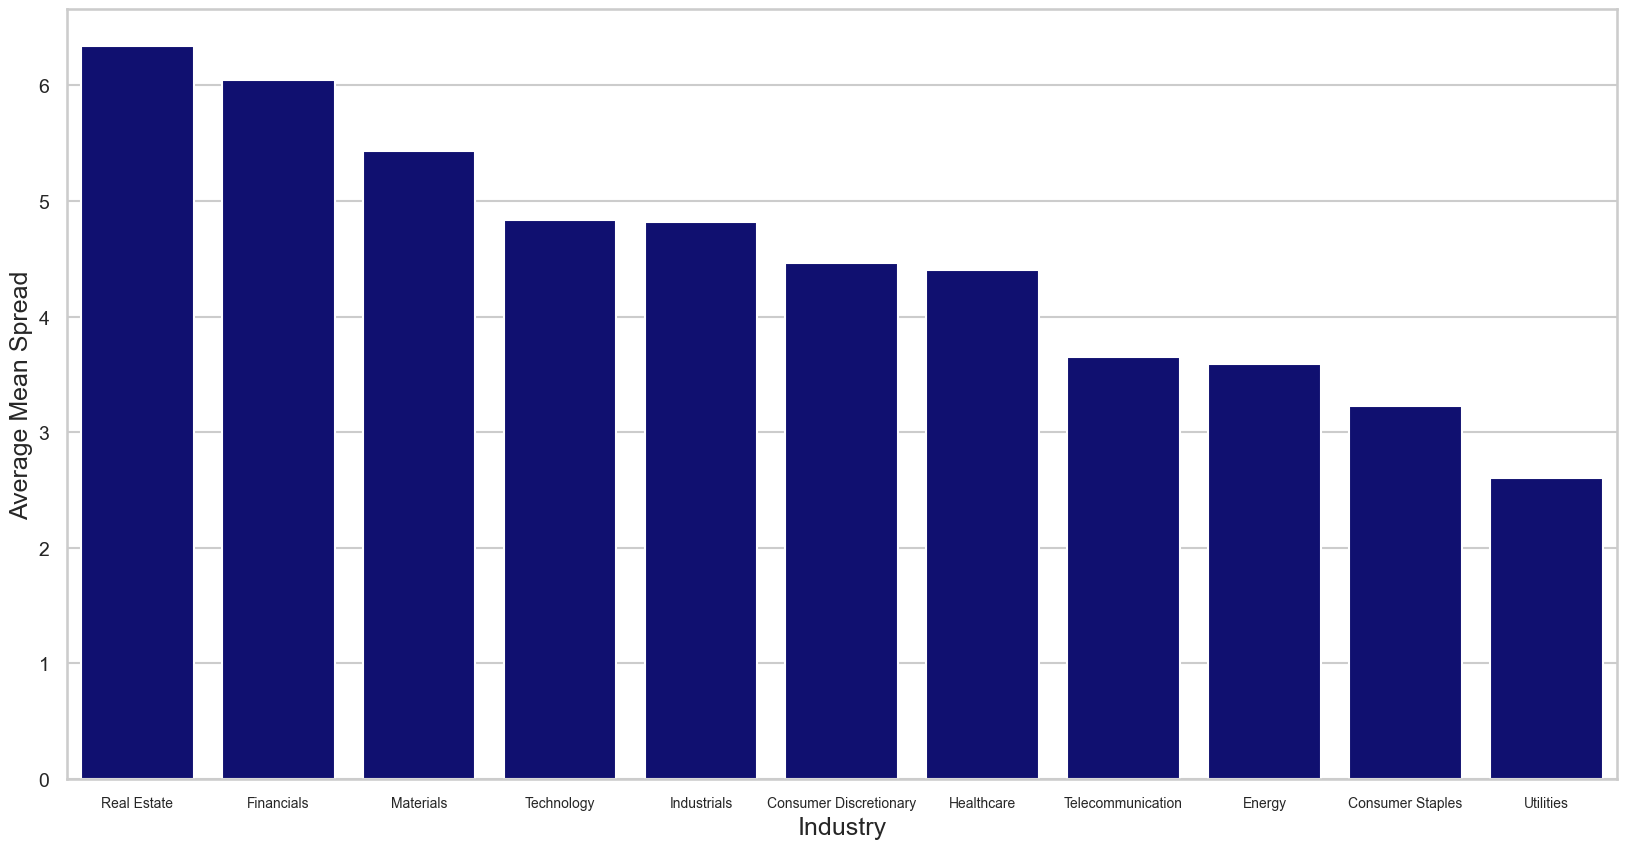

In [43]:
industry_mean_spread = {}

for industry, assets in industry_categories.items():
    industry_mean_spread[industry] = df_the_mean_spread[df_the_mean_spread['asset'].isin(assets)]['mean_spread'].mean()

# make a dataframe of the industry_mean_spread
df_industry_mean_spread = pd.DataFrame(industry_mean_spread.items(), columns=['industry', 'mean_spread'])


plt.figure(figsize=(20, 10))
# make navy color for the bars
sns.barplot(x='industry', y='mean_spread', data=df_industry_mean_spread.sort_values('mean_spread', ascending=False), color='navy')
# make the name of the y-axis more readable
plt.ylabel('Average Mean Spread', fontsize=18)
plt.xlabel('Industry', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=10)
plt.show()
